# 1. CIFAR 10 model 网络模型

① 下面用 CIFAR 10 model网络来完成分类问题，网络模型如下图所示。

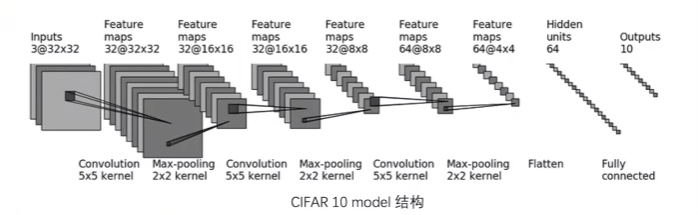

# 2. DataLoader加载数据集

In [ ]:
import torchvision
from torch import nn
from torch.utils.data import DataLoader

# 准备数据集
train_data = torchvision.datasets.CIFAR10('D:\\深度学习\\100_土堆数据集\\dataset',train=True,transform=torchvision.transforms.ToTensor())       
test_data = torchvision.datasets.CIFAR10('D:\\深度学习\\100_土堆数据集\\dataset',train=False,transform=torchvision.transforms.ToTensor())       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data_size, batch_size=64)        
test_dataloader = DataLoader(test_data_size, batch_size=64)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: D:\深度学习\100_土堆数据集\dataset
    Split: Train
    StandardTransform
Transform: ToTensor()
训练数据集的长度：50000
测试数据集的长度：10000


# 3. 测试网络正确

In [5]:
import torch
from torch import nn

# ==========================================
# 1. 定义模型类
# ==========================================
class Tudui(nn.Module):
    def __init__(self):
        super().__init__()        
        # nn.Sequential 是一个容器，它会按照我们在里面写的顺序，
        # 自动把数据依次传给每一层。
        # 好处：在 forward 函数里不用写一长串 x=conv1(x), x=pool1(x)...
        self.model1 = nn.Sequential(
            # --- 第1组：卷积 + 池化 ---
            # 输入: (Batch, 3, 32, 32) -> RGB 3通道
            # 卷积计算: H_out = (32 + 2*2 - 5) / 1 + 1 = 32
            # 输出: (Batch, 32, 32, 32) -> 通道变32，尺寸不变
            nn.Conv2d(3, 32, 5, 1, 2),  # in=3, out=32, k=5, s=1, p=2
            
            # 池化计算: 32 / 2 = 16
            # 输出: (Batch, 32, 16, 16) -> 尺寸减半
            nn.MaxPool2d(2),
            
            # --- 第2组：卷积 + 池化 ---
            # 输入: (Batch, 32, 16, 16)
            # 卷积计算: (16 + 2*2 - 5) / 1 + 1 = 16
            # 输出: (Batch, 32, 16, 16) -> 尺寸不变
            nn.Conv2d(32, 32, 5, 1, 2),
            
            # 池化计算: 16 / 2 = 8
            # 输出: (Batch, 32, 8, 8) -> 尺寸减半
            nn.MaxPool2d(2),
            
            # --- 第3组：卷积 + 池化 ---
            # 输入: (Batch, 32, 8, 8)
            # 卷积计算: (8 + 2*2 - 5) / 1 + 1 = 8
            # 输出: (Batch, 64, 8, 8) -> 通道变64 (特征变多了)，尺寸不变
            nn.Conv2d(32, 64, 5, 1, 2),
            
            # 池化计算: 8 / 2 = 4
            # 输出: (Batch, 64, 4, 4) -> 尺寸再次减半。这是进 Linear 前的最终特征图。
            nn.MaxPool2d(2),
            
            # --- 展平层 ---
            # 作用: 把立体的特征图拍扁成一维向量，以便放入全连接层。
            # 变化: (Batch, 64, 4, 4) -> (Batch, 64*4*4) 即 (Batch, 1024)
            nn.Flatten(), 
            
            # --- 全连接层 ---
            # 输入维度: 1024 (必须和上面展平后的长度一致)
            # 输出维度: 64 (中间层节点数)
            nn.Linear(64*4*4, 64),
            
            # --- 输出层 ---
            # 输出维度: 10 (对应 CIFAR10 的 10 个分类)
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        # 因为用了 Sequential，这里一行代码就搞定了所有层的前向传播
        x = self.model1(x)
        return x
    
# ==========================================
# 2. 自测代码 (Sanity Check)
# ==========================================
if __name__ == '__main__':
    # 实例化模型
    tudui = Tudui()
    
    # 创建一个模拟的输入数据 (假数据)
    # 形状: (Batch_Size=64, Channels=3, Height=32, Width=32)
    # 作用: 用来验证网络能不能跑通，输出尺寸对不对。
    input = torch.ones((64, 3, 32, 32))
    
    # 把假数据喂给模型
    output = tudui(input)
    
    # 打印输出形状
    # 预期结果: torch.Size([64, 10])
    # 解释: 64 是 batch_size (每张图对应一个结果)，10 是分类的概率/分数
    print(output.shape)

torch.Size([64, 10])


__name__ == '__main__' 这句话是 Python 中非常经典的一个**“开关”**，全称叫 “脚本入口判断”。

简单来说，它的作用是：防止你写的测试代码在被别人调用（import）时意外运行。

# 4. 网络训练数据

In [6]:
import torchvision
from torch import nn
from torch.utils.data import DataLoader

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10('D:\\深度学习\\100_土堆数据集\\dataset',train=True,transform=torchvision.transforms.ToTensor(),download=True)       
test_data = torchvision.datasets.CIFAR10('D:\\深度学习\\100_土堆数据集\\dataset',train=False,transform=torchvision.transforms.ToTensor(),download=True)       

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0

# 训练的轮次
epoch = 10

for i in range(epoch):
    print(f"-----第 {i+1} 轮训练开始-----")
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        
        print(f"训练次数：{total_train_step},Loss:{loss}")

训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：1,Loss:2.3087823390960693
训练次数：2,Loss:2.315652847290039
训练次数：3,Loss:2.3006820678710938
训练次数：4,Loss:2.318735361099243
训练次数：5,Loss:2.308865785598755
训练次数：6,Loss:2.2973833084106445
训练次数：7,Loss:2.299346446990967
训练次数：8,Loss:2.306925058364868
训练次数：9,Loss:2.301213264465332
训练次数：10,Loss:2.3110625743865967
训练次数：11,Loss:2.293025016784668
训练次数：12,Loss:2.2931923866271973
训练次数：13,Loss:2.306326389312744
训练次数：14,Loss:2.316879987716675
训练次数：15,Loss:2.2928855419158936
训练次数：16,Loss:2.302217483520508
训练次数：17,Loss:2.310936689376831
训练次数：18,Loss:2.299715280532837
训练次数：19,Loss:2.288522481918335
训练次数：20,Loss:2.297100782394409
训练次数：21,Loss:2.299164056777954
训练次数：22,Loss:2.3035502433776855
训练次数：23,Loss:2.299276828765869
训练次数：24,Loss:2.2942616939544678
训练次数：25,Loss:2.3115763664245605
训练次数：26,Loss:2.295483350753784
训练次数：27,Loss:2.3000893592834473
训练次数：28,Loss:2.3025448322296143
训练次数：29,Loss:2.2953429222106934
训练次数：30,Loss:2.294612169265747
训练次数：31,Loss:2.29

KeyboardInterrupt: 

# 5. item作用

In [9]:
import torch

# ==========================================
# 1. 创建一个标量张量 (Scalar Tensor)
# ==========================================
# 语法: torch.tensor(数值)
# 作用: 创建一个 0 维度的张量，里面只包含一个数 5。
# 注意: 这还是一个 PyTorch 的对象，不是普通的 Python 整数。
a = torch.tensor(3)

# ==========================================
# 2. 打印张量本身
# ==========================================
# 输出: tensor(5)
# 说明: 打印出来会带着 "tensor(...)" 的壳，表示它还是个张量类型。
print(a)

# ==========================================
# 3. 提取数值 (关键点)
# ==========================================
# 语法: .item()
# 作用: 将张量中的数据提取出来，转换成 Python 原生的数字 (int 或 float)。
# 限制: 只能用于包含"唯一一个元素"的张量！(如果张量里有多个数，用这个会报错)
# 输出: 5
print(a.item())

tensor(3)
3


- 为什么需要 .item()？
  - 精度更高：.item() 取出的是 Python 的高精度数字。
  - 兼容性：很多 Python 库（如 matplotlib 画图、json 保存数据）不认识 PyTorch 的 Tensor 对象，只认识 Python 的原生数字。所以画图或保存时必须先用 .item() 转一下。

# 6. 查看训练损失

1. 在pytorch中，tensor有一个requires_grad参数，如果设置为True，则反向传播时，该tensor就会自动求导。

2. tensor的requires_grad的属性默认为False，若一个节点（叶子变量：自己创建的tensor）requires_grad被设置为True，那么所有依赖它的节点requires_grad都为True（即使其他相依赖的tensor的requires_grad = False）

3. 当requires_grad设置为False时，反向传播时就不会自动求导了，因此大大节约了显存或者说内存。

4. with torch.no_grad的作用在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。

5. 即使一个tensor（命名为x）的requires_grad = True，在with torch.no_grad计算，由x得到的新tensor（命名为w-标量）requires_grad也为False，且grad_fn也为None,即不会对w求导。

6. torch.no_grad()：停止计算梯度，不能进行反向传播。

In [11]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# =========================================================================
# 1. 定义神经网络模型
# =========================================================================
# 继承 nn.Module，这是所有 PyTorch 神经网络的基类
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        # 使用 Sequential 将层串联起来，代码更简洁
        self.model1 = nn.Sequential(
            # --- 第1层卷积 ---
            # 输入: 3通道 (RGB图片), 输出: 32通道, 核大小: 5x5
            # Padding=2 计算: (32 - 5 + 2*2)/1 + 1 = 32 (尺寸不变)
            nn.Conv2d(3, 32, 5, 1, 2), 
            
            # --- 第1层池化 ---
            # 尺寸减半: 32x32 -> 16x16
            nn.MaxPool2d(2),
            
            # --- 第2层卷积 ---
            # 输入: 32通道, 输出: 32通道
            nn.Conv2d(32, 32, 5, 1, 2),
            
            # --- 第2层池化 ---
            # 尺寸减半: 16x16 -> 8x8
            nn.MaxPool2d(2),
            
            # --- 第3层卷积 ---
            # 输入: 32通道, 输出: 64通道 (特征数量增加)
            nn.Conv2d(32, 64, 5, 1, 2),
            
            # --- 第3层池化 ---
            # 尺寸减半: 8x8 -> 4x4
            nn.MaxPool2d(2),
            
            # --- 展平层 ---
            # 将 (Batch, 64, 4, 4) 的立体数据拉平成 (Batch, 1024) 的一维向量
            nn.Flatten(), 
            
            # --- 全连接层 ---
            # 64*4*4 = 1024 是上一层输出的总特征数
            nn.Linear(64*4*4, 64),
            
            # --- 输出层 ---
            # 10 代表 CIFAR10 数据集的 10 个分类
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        # 前向传播：数据 x 输入，经过 model1 处理，得到输出
        x = self.model1(x)
        return x

# =========================================================================
# 2. 准备数据集
# =========================================================================
# train=True: 下载并加载训练集 (50000张)
train_data = torchvision.datasets.CIFAR10(r'D:\深度学习\100_土堆数据集\dataset', train=True, transform=torchvision.transforms.ToTensor())       
# train=False: 下载并加载测试集 (10000张)
test_data = torchvision.datasets.CIFAR10(r'D:\深度学习\100_土堆数据集\dataset', train=False, transform=torchvision.transforms.ToTensor())       

# 打印数据集长度，确认数据加载成功
train_data_size = len(train_data)
test_data_size = len(test_data)
print("训练数据集的长度：{}".format(train_data_size)) # 输出 50000
print("测试数据集的长度：{}".format(test_data_size))   # 输出 10000

# 利用 DataLoader 加载数据集
# batch_size=64: 每次从仓库里拿 64 张图打包给模型
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# =========================================================================
# 3. 创建模型、损失函数与优化器
# =========================================================================
# 实例化模型
tudui = Tudui() 

# 损失函数: CrossEntropyLoss (交叉熵)
# 专门用于分类任务，内部包含了 Softmax 和 Log 计算
loss_fn = nn.CrossEntropyLoss()

# 优化器: SGD (随机梯度下降)
# learning_rate = 0.01，控制参数更新的步长
learning = 0.01 
optimizer = torch.optim.SGD(tudui.parameters(), lr=learning) 

# =========================================================================
# 4. 设置训练流程参数
# =========================================================================
# 记录总的训练步数 (每训练一个 Batch 算一步)
total_train_step = 0
# 记录总的测试步数 (每测试完一轮算一步)
total_test_step = 0
# 训练轮数 (Epoch): 把整个数据集看 10 遍
epoch = 10

# =========================================================================
# 5. 开始训练循环
# =========================================================================
for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # ---------------------------
    # 训练步骤 (Training Loop)
    # ---------------------------
    # 每次从 dataloader 取出一批数据 (imgs: 64张图, targets: 64个标签)
    for data in train_dataloader:
        imgs, targets = data
        
        # 1. 前向传播: 模型通过图片预测结果
        outputs = tudui(imgs)
        
        # 2. 计算损失: 比较预测结果 outputs 和真实标签 targets 的差距
        loss = loss_fn(outputs, targets) 
        
        # 3. 梯度清零: 把上一次计算的梯度清理掉 (避免累加)
        optimizer.zero_grad() 
        
        # 4. 反向传播: 计算 Loss 对每个参数的梯度 (寻找下山的路)
        loss.backward() 
        
        # 5. 参数更新: 根据梯度调整参数 (迈出一步)
        optimizer.step() 
        
        # 记录训练次数
        total_train_step = total_train_step + 1
        
        # 每隔 100 次打印一下 Log，避免控制台刷屏太快
        if total_train_step % 100 == 0:
            # .item() 将 Tensor 转换为 Python 标准数值
            print(f"训练次数：{total_train_step},Loss:{loss}") 
    
    # ---------------------------
    # 测试步骤 (Testing Loop)
    # ---------------------------
    # 每一轮训练结束后，用测试集验证一下模型现在的水平
    total_test_loss = 0
    
    # torch.no_grad(): 告诉 PyTorch 下面的代码只需要前向计算，
    # 不需要计算梯度 (能省内存，加速计算)，因为测试不需要更新参数。
    with torch.no_grad(): 
        for data in test_dataloader:
            imgs, targets = data
            outputs = tudui(imgs)
            
            # 计算这批数据的 Loss
            loss = loss_fn(outputs, targets) 
            
            # 将 Loss 累加，算出整套测试集的总误差
            total_test_loss = total_test_loss + loss
            
    print(f"整体测试集上的Loss:{total_test_loss}")
    
    total_test_step = total_test_step + 1
        

训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100,Loss:2.2851486206054688
训练次数：200,Loss:2.2869608402252197
训练次数：300,Loss:2.247696876525879
训练次数：400,Loss:2.174241781234741
训练次数：500,Loss:2.0526342391967773
训练次数：600,Loss:2.035698175430298
训练次数：700,Loss:1.966726541519165
整体测试集上的Loss:308.77239990234375
-----第 2 轮训练开始-----
训练次数：800,Loss:1.8625493049621582


KeyboardInterrupt: 

1. 核心比喻：平时做作业 vs. 期末考试
你可以把神经网络想象成一个学生。

场景 A：训练阶段 (Training) -> requires_grad=True
状态：学生在做练习题。

目的：为了学会。做错了要找原因，要改正。

操作：学生不仅要写出答案，还要记住做题的每一步思路（这就是 PyTorch 里的“计算图”）。

为什么：因为等会儿老师改卷子（算 Loss），发现错了，学生需要回过头去检查是哪一步想岔了（反向传播），然后修正自己的脑子（更新参数）。

代价：因为要记每一步的思路，脑子（显存/内存）很累，记得东西很多。

场景 B：测试阶段 (Testing/Validation) -> with torch.no_grad()
状态：你的代码里写的那段 test_dataloader 循环，就是让学生去期末考试。

目的：只是为了拿个分，看看学得怎么样。

操作：学生看到题，直接写答案就行了。

为什么：因为是考试，就算做错了，现在也不允许改（不更新参数，不调用 optimizer.step()）。既然不需要改，那何必浪费脑子去记做题步骤呢？

结果：直接写答案，脑子很轻松（省显存），做题速度也快（加速）。

# 7. 保存每一轮后参数

In [1]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader

# ==========================================
# 1. 搭建神经网络 (Model Definition)
# ==========================================
# 继承 nn.Module，这是所有 PyTorch 网络的基类
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        # 使用 Sequential 容器，把层按顺序串起来，代码更简洁
        self.model1 = nn.Sequential(
            # --- 第1层：卷积 ---
            # 输入: 3通道 (RGB图片)
            # 输出: 32通道 (提取了32种特征)
            # 计算: (32 - 5 + 2*2)/1 + 1 = 32 (padding=2 维持了尺寸不变)
            nn.Conv2d(3, 32, 5, 1, 2), 
            
            # --- 第1层：池化 ---
            # 作用: 下采样，减少数据量。 32x32 -> 16x16
            nn.MaxPool2d(2),
            
            # --- 第2层：卷积 ---
            # 输入: 32通道 -> 输出: 32通道 (尺寸维持 16x16)
            nn.Conv2d(32, 32, 5, 1, 2),
            
            # --- 第2层：池化 ---
            # 16x16 -> 8x8
            nn.MaxPool2d(2),
            
            # --- 第3层：卷积 ---
            # 输入: 32通道 -> 输出: 64通道 (特征数量翻倍)
            nn.Conv2d(32, 64, 5, 1, 2),
            
            # --- 第3层：池化 ---
            # 8x8 -> 4x4 (这是进全连接层前的最终尺寸)
            nn.MaxPool2d(2),
            
            # --- 展平层 ---
            # 作用: 把立体的 Feature Map (64, 4, 4) 拉平成一维向量
            # 长度 = 64 * 4 * 4 = 1024
            nn.Flatten(), 
            
            # --- 全连接层 ---
            # 1024 -> 64
            nn.Linear(64*4*4, 64),
            
            # --- 输出层 ---
            # 64 -> 10 (对应 CIFAR10 的 10 个分类)
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        # 前向传播：数据 x 只要穿过 model1 就行了
        x = self.model1(x)
        return x

# ==========================================
# 2. 准备数据集 (Data Preparation)
# ==========================================
# 路径前的 r 表示 raw string，防止 Windows 路径中的反斜杠 \ 被转义
# train=True: 加载训练集 (50000张)
train_data = torchvision.datasets.CIFAR10(r'D:\深度学习\100_土堆数据集\dataset', train=True, transform=torchvision.transforms.ToTensor(), download=True)       
# train=False: 加载测试集 (10000张)
test_data = torchvision.datasets.CIFAR10(r'D:\深度学习\100_土堆数据集\dataset', train=False, transform=torchvision.transforms.ToTensor(), download=True)        

# 获取数据集长度
train_data_size = len(train_data)
test_data_size = len(test_data)
print("训练数据集的长度：{}".format(train_data_size)) # 输出 50000
print("测试数据集的长度：{}".format(test_data_size))   # 输出 10000

# DataLoader: 负责把数据打包成 Batch
# batch_size=64: 每次给模型喂 64 张图
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# ==========================================
# 3. 初始化训练组件 (Setup)
# ==========================================
# 实例化模型
tudui = Tudui() 

# 损失函数: 交叉熵 (专门用于多分类任务)
# 它会自动计算 Softmax 和 Log
loss_fn = nn.CrossEntropyLoss()

# 优化器: SGD (随机梯度下降)
# learning_rate = 0.01: 控制每次参数更新的幅度
learning = 0.01 
optimizer = torch.optim.SGD(tudui.parameters(), learning) 

# 计数器
total_train_step = 0 # 记录训练了多少个 batch (步数)
total_test_step = 0  # 记录测试了多少次
epoch = 10           # 总共训练 10 轮

# ==========================================
# 4. 训练与测试循环 (Main Loop)
# ==========================================
for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # ---------------------------
    # A. 训练阶段 (Training)
    # ---------------------------
    # (可选) tudui.train() : 如果有Dropout或BatchNorm层，这里需要开启训练模式
    for data in train_dataloader:
        imgs, targets = data
        
        # 1. 前向传播 (Forward)
        outputs = tudui(imgs)
        
        # 2. 计算损失 (Loss)
        loss = loss_fn(outputs, targets) 
        
        # 3. 反向传播与优化 (Optimization) --- 核心三步曲 ---
        optimizer.zero_grad()  # 梯度清零 (把上一步剩下的梯度倒掉)
        loss.backward()        # 反向传播 (计算当前梯度)
        optimizer.step()       # 更新参数 (根据梯度修改权重)
        
        # 4. 打印日志
        total_train_step = total_train_step + 1
        # 每训练 100 个 Batch 打印一次，避免刷屏
        if total_train_step % 100 == 0:
            # loss.item() 把 Tensor 里的数值取出来，方便打印
            print("训练次数：{}, Loss:{}".format(total_train_step, loss.item())) 
    
    # ---------------------------
    # B. 测试阶段 (Testing)
    # ---------------------------
    # 每一轮训练完，用测试集验证一下效果
    # (可选) tudui.eval() : 开启验证模式
    total_test_loss = 0
    
    # with torch.no_grad(): 强制关闭梯度计算引擎
    # 作用：1.省显存 2.加速计算 (因为测试不需要反向传播)
    with torch.no_grad():
        for data in test_dataloader:
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets)
            # 累加 Loss，算出整套测试集的总误差
            total_test_loss = total_test_loss + loss.item() 
            
    print("整体测试集上的Loss:{}".format(total_test_loss))
    total_test_step = total_test_step + 1
    
    # ---------------------------
    # C. 模型保存 (Saving)
    # ---------------------------
    # 保存每一轮训练后的模型
    # 格式：tudui_0.pth, tudui_1.pth ...
    torch.save(tudui, f"D:\\深度学习\\Pytorch的使用\\model\\tudui_{i}.pth")
    print("模型已保存")

训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100, Loss:2.2954013347625732
训练次数：200, Loss:2.2876718044281006
训练次数：300, Loss:2.2744815349578857
训练次数：400, Loss:2.213883876800537
训练次数：500, Loss:2.1374871730804443
训练次数：600, Loss:2.0653278827667236
训练次数：700, Loss:2.0152084827423096
整体测试集上的Loss:311.2083228826523
模型已保存
-----第 2 轮训练开始-----
训练次数：800, Loss:1.8508447408676147
训练次数：900, Loss:1.8060863018035889
训练次数：1000, Loss:1.9003418684005737
训练次数：1100, Loss:2.0008785724639893
训练次数：1200, Loss:1.6996160745620728


KeyboardInterrupt: 

# 8. argmax作用

In [2]:
import torch

# 1. 模拟模型的输出 (Outputs)
# 假设 Batch_Size = 2 (有2个样本)
# 假设有 2 个分类 (二分类问题)
# 形状: (2, 2) -> (样本数, 类别数)
outputs = torch.tensor([[0.1, 0.2],   # 第1个样本: 预测类别0的分数0.1, 类别1的分数0.2
                        [0.05, 0.4]]) # 第2个样本: 预测类别0的分数0.05, 类别1的分数0.4

# ==========================================
# 2. 理解 argmax (寻找最大值的索引)
# ==========================================

# 语法: argmax(0) -> 纵向压缩 (跨行比较)
# 逻辑: 
#   - 比较第0列 (0.1 vs 0.05) -> 最大是 0.1 -> 索引是 0
#   - 比较第1列 (0.2 vs 0.4)  -> 最大是 0.4 -> 索引是 1
# 结果: tensor([0, 1])
# 含义: "在这一列里，哪一行的数最大？" (通常不用于计算准确率)
print(outputs.argmax(0)) 

# 语法: argmax(1) -> 横向压缩 (跨列比较) 【这是我们最常用的！】
# 逻辑:
#   - 看第1行 (0.1, 0.2)  -> 最大是 0.2 -> 索引是 1 (预测为类别1)
#   - 看第2行 (0.05, 0.4) -> 最大是 0.4 -> 索引是 1 (预测为类别1)
# 结果: tensor([1, 1])
# 含义: "对于这个样本，哪个类别的分数最高？"
print(outputs.argmax(1)) 

# ==========================================
# 3. 模拟计算准确率
# ==========================================

# ⚠️ 注意：为了演示计算过程，这里沿用了你代码里的 argmax(0)
# 但在真实训练中，这里通常应该写 outputs.argmax(1)
preds = outputs.argmax(0) # 结果是 [0, 1]

# 真实标签 (Targets)
# 第1个样本是类别0，第2个样本是类别1
targets = torch.tensor([0, 1])

# 核心步骤: 比较与求和
# 1. (preds == targets): 比较预测值和真实值是否相等
#    [0, 1] == [0, 1] -> [True, True]
# 2. .sum(): 统计 True 的个数 (True当做1, False当做0)
#    True + True = 2
print((preds == targets).sum()) # 输出: tensor(2)

tensor([0, 1])
tensor([1, 1])
tensor(2)


# 9. 打印正确率

In [4]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10(r'D:\深度学习\100_土堆数据集\dataset', train=True, transform=torchvision.transforms.ToTensor(), download=True)       
# train=False: 加载测试集 (10000张)
test_data = torchvision.datasets.CIFAR10(r'D:\深度学习\100_土堆数据集\dataset', train=False, transform=torchvision.transforms.ToTensor(), download=True)               

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard
writer = SummaryWriter("logs")

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{},Loss:{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():  # 没有梯度了
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy = total_accuracy + accuracy
            
    print("整体测试集上的Loss：{}".format(total_test_loss))
    print("整体测试集上的正确率：{}".format(total_accuracy/test_data_size))
    total_test_step = total_test_step + 1
    
    torch.save(tudui, f"D:\\深度学习\\Pytorch的使用\\model\\tudui_{i+1}.pth")
    print("模型已保存")
    
writer.close()

训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100,Loss:2.2823076248168945
训练次数：200,Loss:2.274754524230957
训练次数：300,Loss:2.2235279083251953
训练次数：400,Loss:2.1669116020202637
训练次数：500,Loss:2.0755064487457275
训练次数：600,Loss:2.0025384426116943
训练次数：700,Loss:2.0317695140838623
整体测试集上的Loss：319.204256772995
整体测试集上的正确率：0.2687999904155731
模型已保存
-----第 2 轮训练开始-----
训练次数：800,Loss:1.9110145568847656
训练次数：900,Loss:1.9112340211868286


KeyboardInterrupt: 

# 10. 特殊层作用

① model.train()和model.eval()的区别主要在于Batch Normalization和Dropout两层。

② 如果模型中有BN层(Batch Normalization）和 Dropout，需要在训练时添加model.train()。model.train()是保证BN层能够用到每一批数据的均值和方差。对于Dropout，model.train()是随机取一部分网络连接来训练更新参数。

③ 不启用 Batch Normalization 和 Dropout。
如果模型中有BN层(Batch Normalization）和Dropout，在测试时添加model.eval()。model.eval()是保证BN层能够用全部训练数据的均值和方差，即测试过程中要保证BN层的均值和方差不变。对于Dropout，model.eval()是利用到了所有网络连接，即不进行随机舍弃神经元。

④ 训练完train样本后，生成的模型model要用来测试样本。在model(test)之前，需要加上model.eval()，否则的话，有输入数据，即使不训练，它也会改变权值。这是model中含有BN层和Dropout所带来的的性质。

⑤ 在做one classification的时候，训练集和测试集的样本分布是不一样的，尤其需要注意这一点。

In [ ]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader

# from model import * 相当于把 model中的所有内容写到这里，这里直接把 model 写在这里
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = nn.Sequential(
            nn.Conv2d(3,32,5,1,2),  # 输入通道3，输出通道32，卷积核尺寸5×5，步长1，填充2    
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,1,2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,1,2),
            nn.MaxPool2d(2),
            nn.Flatten(),  # 展平后变成 64*4*4 了
            nn.Linear(64*4*4,64),
            nn.Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

# 准备数据集
train_data = torchvision.datasets.CIFAR10(r'D:\深度学习\100_土堆数据集\dataset', train=True, transform=torchvision.transforms.ToTensor())       
# train=False: 加载测试集 (10000张)
test_data = torchvision.datasets.CIFAR10(r'D:\深度学习\100_土堆数据集\dataset', train=False, transform=torchvision.transforms.ToTensor())               

# length 长度
train_data_size = len(train_data)
test_data_size = len(test_data)
# 如果train_data_size=10，则打印：训练数据集的长度为：10
print("训练数据集的长度：{}".format(train_data_size))
print("测试数据集的长度：{}".format(test_data_size))

# 利用 Dataloader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)        
test_dataloader = DataLoader(test_data, batch_size=64)

# 创建网络模型
tudui = Tudui() 

# 损失函数
loss_fn = nn.CrossEntropyLoss() # 交叉熵，fn 是 fuction 的缩写

# 优化器
learning = 0.01  # 1e-2 就是 0.01 的意思
optimizer = torch.optim.SGD(tudui.parameters(),learning)   # 随机梯度下降优化器  

# 设置网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 训练的轮次
epoch = 10

# 添加 tensorboard

for i in range(epoch):
    print("-----第 {} 轮训练开始-----".format(i+1))
    
    # 训练步骤开始
    tudui.train() # 当网络中有dropout层、batchnorm层时，这些层能起作用
    for data in train_dataloader:
        imgs, targets = data
        outputs = tudui(imgs)
        loss = loss_fn(outputs, targets) # 计算实际输出与目标输出的差距
        
        # 优化器对模型调优
        optimizer.zero_grad()  # 梯度清零
        loss.backward() # 反向传播，计算损失函数的梯度
        optimizer.step()   # 根据梯度，对网络的参数进行调优
        
        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{},Loss:{}".format(total_train_step,loss.item()))  # 方式二：获得loss值
    
    # 测试步骤开始（每一轮训练后都查看在测试数据集上的loss情况）
    tudui.eval()  # 当网络中有dropout层、batchnorm层时，这些层不能起作用
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():  # 没有梯度了
        for data in test_dataloader: # 测试数据集提取数据
            imgs, targets = data
            outputs = tudui(imgs)
            loss = loss_fn(outputs, targets) # 仅data数据在网络模型上的损失
            total_test_loss = total_test_loss + loss.item() # 所有loss
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy = total_accuracy + accuracy
            
    print("整体测试集上的Loss:{}".format(total_test_loss))
    print("整体测试集上的正确率:{}".format(total_accuracy/test_data_size))
    total_test_step = total_test_step + 1
    
    torch.save(tudui, f"D:\\深度学习\\Pytorch的使用\\model\\tudui_{i+1}.pth") 
    print("模型已保存")
    

Files already downloaded and verified
Files already downloaded and verified
训练数据集的长度：50000
测试数据集的长度：10000
-----第 1 轮训练开始-----
训练次数：100，Loss：2.292330265045166
训练次数：200，Loss：2.2909886837005615
训练次数：300，Loss：2.2775135040283203
训练次数：400，Loss：2.2197389602661133
训练次数：500，Loss：2.1354541778564453
训练次数：600，Loss：2.034959077835083
训练次数：700，Loss：2.0130105018615723
整体测试集上的Loss：319.69296860694885
整体测试集上的正确率：0.2678999900817871
模型已保存
-----第 2 轮训练开始-----
训练次数：800，Loss：1.8924949169158936
训练次数：900，Loss：1.8564952611923218
训练次数：1000，Loss：1.9163199663162231
训练次数：1100，Loss：1.972761631011963
训练次数：1200，Loss：1.698002815246582
训练次数：1300，Loss：1.6668578386306763
训练次数：1400，Loss：1.7467551231384277
训练次数：1500，Loss：1.8171281814575195
整体测试集上的Loss：294.6422094106674
整体测试集上的正确率：0.3321000039577484
模型已保存
-----第 3 轮训练开始-----
训练次数：1600，Loss：1.7753604650497437
训练次数：1700，Loss：1.637514591217041
训练次数：1800，Loss：1.936806559562683
训练次数：1900，Loss：1.710182785987854
训练次数：2000，Loss：1.9697281122207642
训练次数：2100，Loss：1.507324457168579
训练次数

你可以把深度学习模型想象成一个**“学生”**。

model.train() 是 “平时做练习题” 的状态。

model.eval() 是 “期末考试” 的状态。

这张图解释了，为什么在“做题”和“考试”时，大脑（模型）里的两个特殊结构（Dropout 和 Batch Normalization）必须表现得不一样。

我用大白话给你翻译一下这 5 点核心内容：

1. 核心主角：Dropout 和 BN 层
普通的层（比如 卷积层 Conv2d、全连接层 Linear）在训练和测试时表现是一模一样的。 唯独这两个家伙是“双面人”，如果不告诉它们现在是考试，它们会捣乱。

2. Dropout 层（防止学生死记硬背）
训练模式 (train)：

行为：“随机扔掉一部分课本”。

目的：模型会随机“断开”一些神经元（比如 30% 不工作）。这样强迫剩下的神经元加倍努力，防止模型“偷懒”或者死记硬背（过拟合）。

考试模式 (eval)：

行为：“带上所有课本进考场”。

目的：这时候不需要训练了，我们需要火力全开，利用所有的神经元来给出最精准的答案。

如果不加 eval() 会怎样？：考试时模型还在随机扔掉神经元，导致预测结果忽高忽低，不准确。

3. Batch Normalization (BN) 层（防止评分标准乱变）
这是最容易坑新手的点！BN 层的作用是对数据进行“标准化”（比如减均值，除方差）。

训练模式 (train)：

行为：“按这一批次 (Batch) 的同学算平均分”。

目的：每次来 64 张图，BN 层就算出这 64 张图的平均值和方差，用来处理数据。同时，它会悄悄拿个小本子记下来：“这一轮的平均值大概是多少”，用来估算全局的情况。

考试模式 (eval)：

行为：“按全校的历史平均分算分”。

目的：考试时可能只有 1 张图进来，你没法算“这一批的平均值”（一张图没有方差）。所以，BN 层会拿出那个小本子，用训练时记录下来的全局平均值来处理数据。

如果不加 eval() 会怎样？：

数据污染：模型会根据测试集的数据去更新那个“小本子”，这相当于在考试的时候偷看题目修改答案，是不合规的。

预测错误：如果测试时 batch_size=1，计算出的方差可能出问题，导致预测结果完全离谱。

4. 总结：那段话到底在说什么？
图里第 ④ 点是重点警告：

警告： 如果你拿测试数据跑模型，却忘了加 model.eval()： 即便你没有写 optimizer.step()（没有反向传播更新权重），BN 层的那个“小本子”（统计参数）依然会被修改！

这意味着你的模型在测试阶段被“改动”了，这是绝对不行的。